<a href="https://colab.research.google.com/github/min0j98/mobis_aistudy_2023/blob/master/DL_04_Mnist_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries load

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

## Dataset load

In [2]:
# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## 데이터 전처리

In [3]:
# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 모델 구축

In [4]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



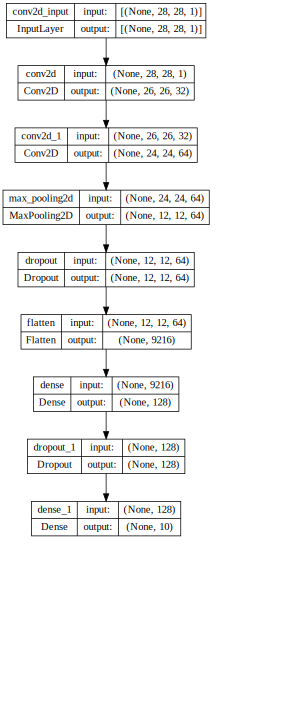

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.09027, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.09027 to 0.05735, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05735 to 0.05060, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05060 to 0.04719, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04719 to 0.04637, saving model to ./MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04637 to 0.04305, saving model to ./MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04305 to 0.04184, saving model to ./MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.04184 to 0.04138, saving model to ./MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.04138

Epoch 10: val_loss improved from 0.04138 to 0.04122, saving model to ./MNIST_CNN.hdf5

Epoch 11: val_loss improved from 0.04122 to 0.04101, saving model to ./MNIST_CNN.hdf5

Epoch 12: val_loss did not improve from 0.04101

Epoch 13: val_loss did not improve from 0.04

## 학습 그래프 분석

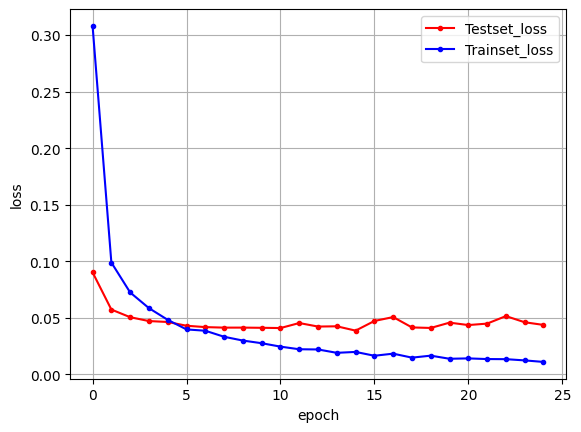

In [7]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 예측성능 검토

In [8]:
def y_inv_cat(y,y_d):
    y_rev1 = np.argmax(y,axis=1)
    y_rev = y_rev1 + y_d
    return y_rev

In [9]:
y_testpredsc = model.predict(X_test)
y_testpred = y_inv_cat(y_testpredsc,0)
y_test_ = y_inv_cat(y_test,0)

313/313 [==============================] - 8s 26ms/step


In [10]:
y_testpred

array([7, 2, 1, ..., 4, 5, 6])

In [11]:

from sklearn.metrics import precision_score , recall_score , confusion_matrix, f1_score
import seaborn as sns

In [12]:

precision = precision_score(y_test_, y_testpred,average= "macro")
recall = recall_score(y_test_, y_testpred,average= "macro")
f1_score_ =f1_score(y_test_, y_testpred,average= "macro")
print('정밀도: {0:.4f}, 재현율: {1:.4f}, f1_score: {1:.4f}'.format(precision, recall, f1_score_))


정밀도: 0.9921, 재현율: 0.9920, f1_score: 0.9920


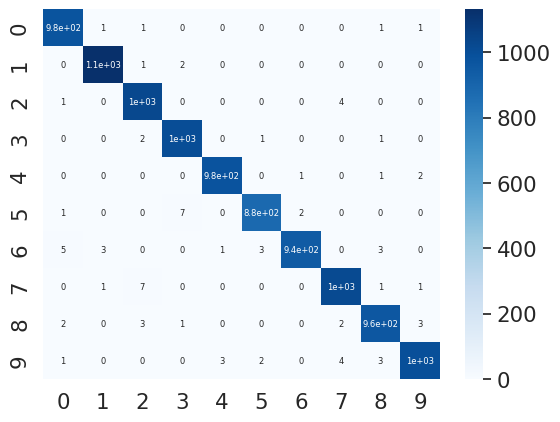

In [13]:
import seaborn
conf = confusion_matrix(y_test_, y_testpred)
seaborn.set(font_scale=1.4) # for label size
seaborn.heatmap(conf, annot=True, annot_kws={"size": 6}, cmap="Blues") # font size

plt.show()

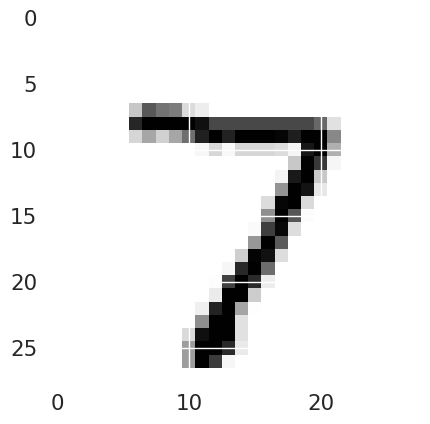

In [14]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_test[0], cmap='Greys')
plt.show()

In [15]:
print("첫번째 이미지의 예측 결과는 ", y_testpred[0])

첫번째 이미지의 예측 결과는  7
